# E-commerce A/B Testing

### Introduction:

- The purpose of this A/B testing project is to compare the performance of the current website landing page (old_page) with a new website landing page (new_page) in terms of conversion rate. 
- A/B testing is a statistical hypothesis testing method that can be used to determine which version of a webpage or application results in the best user experience and higher conversion rates. 
- The goal is to use A/B testing to determine whether the new webpage results in a statistically significant increase in the conversion rate compared to the old webpage.

### Problem Statement:
- The conversion rate of the current website landing page is low, and there is a need to improve it to increase sales and revenue. 
- The company has created a new landing page and wants to know if it performs better than the old landing page in terms of conversion rate. 
- The problem statement is to identify whether the new landing page results in a statistically significant increase in the conversion rate compared to the old landing page.

### Scope:
- The scope of this project is to design and conduct an A/B test to determine whether the new landing page results in a statistically significant increase in the conversion rate compared to the old landing page. 
- The test will be conducted on a randomly selected sample of website visitors who will be randomly assigned to either the control group, which will see the old landing page, or the treatment group, which will see the new landing page. 
- The test will run for a sufficient amount of time to collect enough data to draw statistically valid conclusions.

### Challenges:
- One of the main challenges in this project is to ensure that the test is properly designed to avoid bias and ensure statistical validity. 
- Another challenge is to ensure that the sample size is large enough to detect statistically significant differences in the conversion rates. 
- It may also be a challenge to ensure that the test is run for a sufficient amount of time to collect enough data to draw statistically valid conclusions.

### Risks:
- There is a risk that the test may not show a statistically significant difference between the old and new landing pages, which would mean that the company would have invested resources in creating a new landing page without seeing any benefit. 
- There is also a risk that the test may show a statistically significant difference, but the new landing page may not result in a practical improvement in conversion rates.
- Finally, there is a risk that the test may be biased or invalid, resulting in incorrect conclusions being drawn.

# Importing Libraries


In [2]:
# basics
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#warning
import warnings
warnings.filterwarnings('ignore')

#setting notebook style
sns.set_style('darkgrid')

In [3]:
experiment= pd.read_csv('ab_test.csv')
experiment.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [4]:
countries=pd.read_csv('countries_ab.csv')
countries

,id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290579,653118,US
290580,878226,UK
290581,799368,UK
290582,655535,CA


In [5]:
print('Shape of experiment dataset:', experiment.shape)
print('Shape of countries dataset:', countries.shape)

Shape of experiment dataset: (294478, 5)
Shape of countries dataset: (290584, 2)


In [6]:
print(experiment.info())
print('===========================================')
print(countries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         294478 non-null  int64 
 1   time       294478 non-null  object
 2   con_treat  294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB
None


experiment dataset:

- It contains 294,478 rows and 5 columns.
- There are no missing values in any of the columns, as indicated by the "Non-Null Count" values for each column.
- The 'id', 'con_treat', and 'page' columns are stored as objects (strings), while the 'time' and 'converted' columns are stored as integers.
- The memory usage of the data frame is 11.2+ MB.

countries dataset:

- It contains 290,584 rows and 2 columns.
- There are no missing values in any of the columns.
- The 'id' column is stored as an integer, while the 'country' column is stored as an object (string).
- The memory usage of the data frame is 4.4+ MB.

In [67]:
experiment.duplicated().sum()

0

There are no duplicated records in the dataset

In [7]:
experiment.describe()

,id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


From the mean of the converted column, we can say that around 12% users are converted

In [8]:
print(experiment.describe(include='O'))
print('===============================')
print(countries.describe(include='O'))

           time  con_treat      page
count    294478     294478    294478
unique    35993          2         2
top     36:26.7  treatment  old_page
freq         22     147276    147239
       country
count   290584
unique       3
top         US
freq    203619


experiment dataser:

- The 'time' column has 35,993 unique values, which could indicate that the data was collected over a period of time.
- The 'con_treat' column has only two unique values, indicating that the experiment was a simple A/B test.
- The 'page' column also has two unique values, indicating that there were two versions of the landing page.
- The 'top' value of the 'con_treat' column is 'treatment', which occurred 147,276 times.
- The 'top' value of the 'page' column is 'old_page', which occurred 147,239 times.


countries dataset:

- The 'country' column is a categorical column.
- There are 290,584 rows in the 'country' column, indicating that there are 3,894 missing values.
- The 'top' value of the 'country' column is 'US', which occurred 203,619 times.

In [9]:
# checking unique values

print('Unique values in con_treat column are:')
print(list(experiment['con_treat'].unique()))
print('Number of unique values:', len(list(experiment['con_treat'].unique())))
print('===============================')
print('Unique values in page column are:')
print(list(experiment['page'].unique()))
print('Number of unique values:', len(list(experiment['page'].unique())))
print('===============================')
print('Unique values in country column are:')
print(list(countries['country'].unique()))
print('Number of unique values:', len(list(countries['country'].unique())))

Unique values in con_treat column are:
['control', 'treatment']
Number of unique values: 2
Unique values in page column are:
['old_page', 'new_page']
Number of unique values: 2
Unique values in country column are:
['UK', 'US', 'CA']
Number of unique values: 3


### Merging both dataset

In [10]:
data= experiment.merge(countries, on='id')

In [11]:
print('Shape of experiment dataset:', experiment.shape)
print('Shape of countries dataset:', countries.shape)
print('Shape of merged dataset:',data.shape)

Shape of experiment dataset: (294478, 5)
Shape of countries dataset: (290584, 2)
Shape of merged dataset: (294478, 6)


In [12]:
data.sample(10)

,id,time,con_treat,page,converted,country
86162,778228,23:51.0,control,old_page,0,CA
134233,695974,39:48.8,control,old_page,0,US
86648,732220,32:07.1,control,old_page,1,US
51263,871147,37:50.0,treatment,new_page,1,US
40564,888491,15:00.3,treatment,new_page,0,US
131437,669026,49:07.4,control,old_page,1,US
277224,806724,13:43.6,treatment,new_page,0,US
11839,763796,21:25.4,treatment,new_page,0,US
115504,922411,59:21.1,treatment,new_page,0,US
108006,809881,22:16.4,treatment,new_page,0,US


# EDA

In [13]:
def plot_piechart(df, columns):
    fig, ax = plt.subplots(1,len(columns), figsize=(20, 20))

    for col, ax in zip(columns, ax.flatten()):
        ax.pie(df[col].value_counts(), autopct='%1.1f%%', startangle=90)
        ax.legend(labels=df[col].value_counts().index, loc='best')
        ax.set_title(col.title(), fontsize=15, fontweight='bold')

    plt.tight_layout()

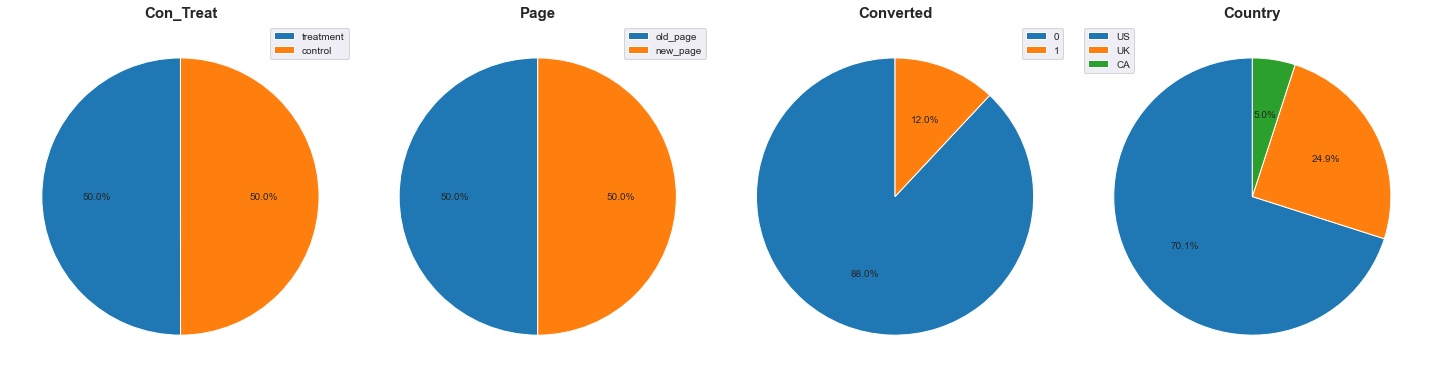

In [14]:
plot_piechart(data, ['con_treat', 'page', 'converted', 'country'])

- There were a total of 147,276 users in the "treatment" group and 147,202 users in the "control" group. Both groups have approximately same proportion.
- For the "page" variable, there were an equal number of users who were shown the "old_page" (147,239) and "new_page" (147,239).
- The majority of users (259,241) did not convert, while 35,237 users did convert.
- Around 70% of users are from USA followed by UK (25%). Least number of users were from Canada (14,695).

## Validating control and treatment group

In [15]:
data['con_treat'].value_counts()

treatment    147276
control      147202
Name: con_treat, dtype: int64

In [16]:
data['page'].value_counts()

old_page    147239
new_page    147239
Name: page, dtype: int64

From the given information, we can see that the number of values for 'con_treat' and 'page' do not match, even though they are expected to be the same. This indicates that there might be some discrepancy or inconsistency in the dataset.

The 'con_treat' column indicates whether a user was in the treatment or control group, while the 'page' column indicates whether the user was shown the old page or new page. Since the control group are the users who are presented with old page whereas treatment group represent the users who are shown the new page, we expect the count of users in each group to be the same.

This discrepancy suggests that there may be some errors or inconsistencies in the data, which could affect the results of any analysis or A/B testing conducted on this dataset. Further investigation and cleaning may be necessary to ensure the validity and reliability of the data. Lets dive deeper into this issue.

In [17]:
discrepancy1=list(data[(data['con_treat']=='control') & (data['page']=='new_page')].index)
discrepancy2=list(data[(data['con_treat']=='treatment') & (data['page']=='old_page')].index)

print('Total number of discrepencies:', len(discrepancy1)+len(discrepancy2))
print('The proportion of discrepency1:', round(len(discrepancy1)*100/data.shape[0],2), '%')
print('The proportion of discrepency2:', round(len(discrepancy2)*100/data.shape[0],2), '%')

Total number of discrepencies: 3893
The proportion of discrepency1: 0.65 %
The proportion of discrepency2: 0.67 %


Since the proportion is very small and almost the same, we will drop the affected rows. But lets cross check how it affects our data

In [18]:
data_new= data.drop(discrepancy1+discrepancy2)
data_new.shape

(290585, 6)

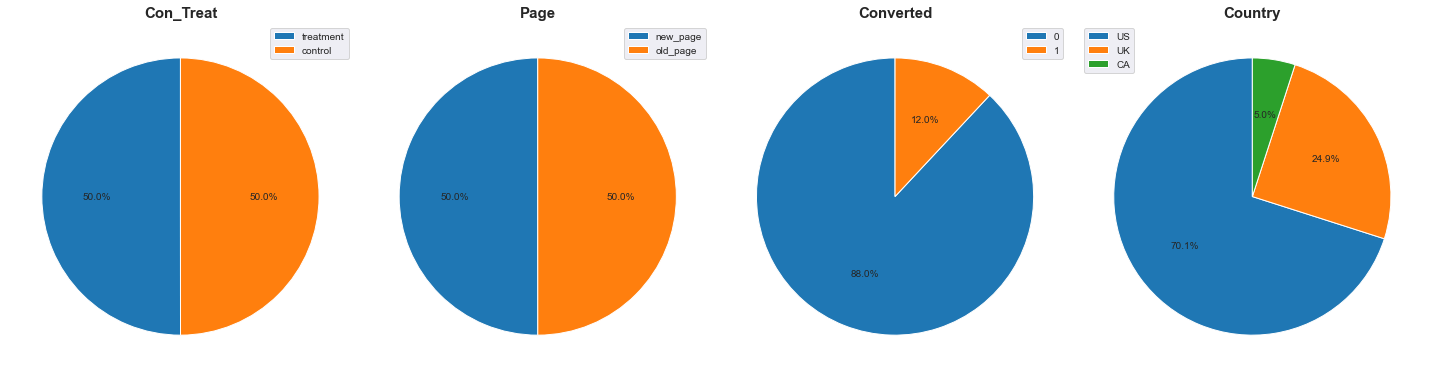

In [19]:
plot_piechart(data_new, ['con_treat', 'page', 'converted', 'country'])

Good News!!!Dropping the affected rows did not distrurb the distribution. So we can proceed further

## Country-wise conversion rate

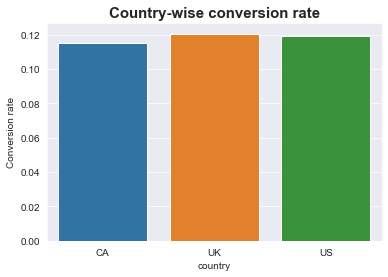

In [20]:
country_wise= data_new.groupby('country')['converted'].mean()
sns.barplot(country_wise.keys(), country_wise.values)
plt.ylabel('Conversion rate')
plt.title('Country-wise conversion rate', fontsize=15, fontweight='bold');

- The mean conversion rate for Canada (CA) is 0.115318, for the United Kingdom (UK) is 0.120594, and for the United States (US) is 0.119546.
- The conversion rate for the UK is slightly higher than the other countries.

# Experiment Design

## Hypothesis

Based on the user experience research, if the client update the checkout page design, the user who are paying for products will increase as measured by the conversion rate.

- Null Hypothesis: The conversion rate for both control and treatment group is same

- Alternate Hypothesis: The conversion rate for both control and treatment group is different

## Design Parameters

#### Power
 - It is the probability of detecting an effect of a pre-determined size or higher, if the treatment results in a true difference in metrics. 
 - It is mathematically represented as one minus beta where beta is the type 2 or false negative error rate that occurs when we fail to reject the null hypothesis and mistakenly conclude that the treatment has no meaningful effect when in reality it does.
 - Power is commonly set at 80% while sizing the test

#### Minimum Detectable effect (MDE)
- It is also known as practical significance level. 
- We set it as the size of the effect of a treatment that we consider significant to the business. 
- In other words, how much do the metrics need to move by for us to make a decision or change our mind about a default action. 
- Any effect under that level would be considered unimportant.

#### Significance level
- The significance level alpha which represents the false positive rate or the probability that we mistakenly reject the Null hypothesis and conclude that the change has a real effect when it doesn't. 
- This is ultimately how we decide if the test result is statistically significant. 
- The p-value is the probability of obtaining the observed result, or more extreme, under the Null hypothesis. 
- If this probability is lower than our pre-selected significance level, then we conclude that it is unlikely that the observed difference between the groups would occur if the null hypothesis was true, leading to rejecting it.
- The selected significant level for this problem is 0.05 



## Analysing probability distribution

In [21]:
sample_means_control=[]
sample_means_treatment=[]

for i in range(1000):
    sample=data_new.sample(frac=1, replace=True)
    mean_control=sample[sample['con_treat']=='control']['converted'].mean()
    mean_treatment=sample[sample['con_treat']=='treatment']['converted'].mean()
    sample_means_control.append(mean_control)
    sample_means_treatment.append(mean_treatment)

The difference mean: 0.0015538621156579169


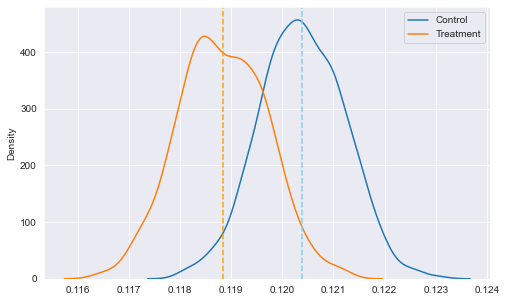

In [22]:
plt.figure(figsize=(8,5))
sns.kdeplot(sample_means_control, label='Control')
sns.kdeplot(sample_means_treatment, label='Treatment')
plt.axvline(np.mean(sample_means_control), linestyle='--', color='skyblue')
plt.axvline(np.mean(sample_means_treatment), linestyle='--', color='orange')
plt.legend();
print('The difference mean:', np.mean(sample_means_control)-np.mean(sample_means_treatment))

- Mean error of treatment group is lesser that control group.
- We can see that there is difference in conversion rate in both groups.
- However it is important to see if this difference is statistically significant

## Sample Ratio Mismatch (SRM)

Sample Ratio Mismatch (SRM) refers to a situation where the actual allocation of participants to different experimental groups in a study deviates from the pre-planned allocation. In experimental research, randomization is typically used to allocate participants to different groups to ensure that each group is comparable and that any observed differences between groups can be attributed to the treatment being tested. The pre-planned allocation of participants is based on a target sample size and a desired allocation ratio across different experimental groups.

However, in practice, SRM can occur due to various reasons such as unequal dropouts or refusals to participate, data collection errors, or miscommunications between study coordinators. When SRM happens, the actual allocation ratio deviates from the pre-planned ratio, leading to unequal group sizes and potentially impacting the statistical power of the study.

One way to assess whether SRM has occurred is by using a Chi-square goodness of fit test. The test compares the observed frequency of participants in each group to the expected frequency based on the pre-planned allocation ratio. If the observed frequencies differ significantly from the expected frequencies, it suggests that SRM has occurred, and the study may need to be adjusted to account for the deviation.

In this case, the Chi-square goodness of fit test is being used to determine whether there is a significant difference between the observed and expected frequencies of participants in the control and treatment groups. We will keep the threshold at 0.01

In [68]:
# Calculate the unique IDs per variant
data_new.groupby('con_treat')['id'].nunique()

con_treat
control      145274
treatment    145310
Name: id, dtype: int64

In [74]:
# Assign the unqiue counts to each variant
control_users=data_new[data_new['con_treat']=='control']['id'].nunique()
treatment_users=data_new[data_new['con_treat']=='treatment']['id'].nunique()
total_users=control_users+treatment_users
# Calculate allocation ratios per variant
control_perc = control_users / total_users
treatment_perc = treatment_users / total_users
print("Percentage of users in the Control group:",100*round(control_perc,5),"%")
print("Percentage of users in the Exposed group:",100*round(treatment_perc,5),"%")

Percentage of users in the Control group: 49.994 %
Percentage of users in the Exposed group: 50.00599999999999 %


In [77]:
observed = [control_users, treatment_users]
expected=[total_users/2, total_users/2]

from scipy.stats import chisquare
chi2= chisquare(observed, f_exp=expected)
if chi2[1]<0.01:
    print('Sample Ratio Mismatch might be present')
else:
    print('Sample Ratio Mismatch likely not present')


Sample Ratio Mismatch likely not present


## Power Analysis

### Effect Size and Sample Size

In A/B testing, power analysis is an important step in the experimental design process, as it helps to ensure that the test is adequately powered to detect a meaningful difference between the treatment and control groups. One of the key parameters used in power analysis is Cohen's d, which is a standardized effect size that represents the difference between the means of the treatment and control groups, divided by the standard deviation. By selecting an appropriate minimum detectable effect of interest and converting it into Cohen's d, we can estimate the required sample size and statistical power of the test. In this way, power analysis helps to ensure that the A/B test is designed and executed in a rigorous and effective manner.

                    cohen's d = (new_mean - mean_control)/ Standard_deviation

In [38]:
mean_control= data_new[data_new['con_treat']=='control']['converted'].mean()
std_control=data_new[data_new['con_treat']=='control']['converted'].std()

#client wants to increase conversion rate by 2%
new_mean=mean_control*1.2

effect_size_std= (new_mean-mean_control)/std_control
print('Standard effect_size:', effect_size_std)

Standard effect_size: 0.07398966332236886


In [42]:
from statsmodels.stats import power

sample_size=power.TTestIndPower().solve_power(effect_size=effect_size_std, power=0.80, alpha=0.05, nobs1=None)
print('Control and treatment groups needs {} samples each'.format(np.ceil(sample_size)))

Control and treatment groups needs 2869.0 samples each


This suggests that for increasing conversion rate by 2%, we would need 2869 samples in each group. Since we already have data with more than 290K records at our disposal, it is statistically valid

Text(0.5, 1.0, 'Conversion rates for Control & Treatment group')

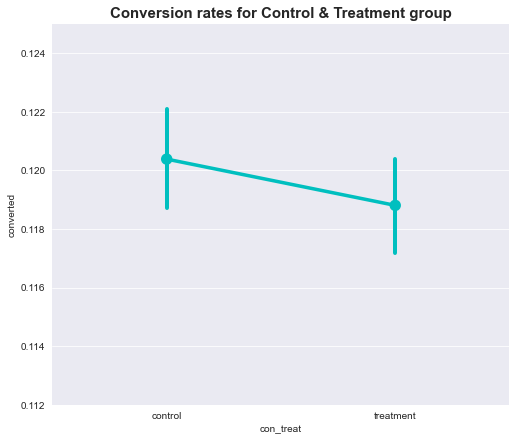

In [100]:
# plotting conversion rates for control and treatment groups
g = sns.PairGrid(data_new, y_vars="converted",
                 x_vars=['con_treat'],
                 height=6, aspect=1.2)

g.map(sns.pointplot, scale=1.3, errwidth=4, color='c')
g.set(ylim=(0.112, 0.1250))
sns.despine(fig=g.fig, left=True)
plt.title('Conversion rates for Control & Treatment group', fontsize=15, fontweight='bold')

From the initial observation, we can already see that the treatment group has slightly lesser conversion rate than control group which insinuates, new page does not attract more users to pay for the product, instead the conversion rate decreases. This supports our alternative hypothesis that conversion rates for both the group are different. However, we would not directly jump to the conclusion at this point. Since the scale of y axis is scaled to the such limits that we can observed the difference. But the difference is actually very less. We will use statistical method to check the difference is significant or not. 

# The z-Test

In [102]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

n_control= control_users
n_treatment= treatment_users

# number of user who atleast paid once for the services
converted_control= data_new[data_new['con_treat']=='control'].groupby('id')['converted'].max().sum()
converted_treatment= data_new[data_new['con_treat']=='treatment'].groupby('id')['converted'].max().sum()

converted_abtest=[converted_control, converted_treatment]
n_abtest=[n_control, n_treatment]

z_stats, p_val= proportions_ztest(converted_abtest, nobs=n_abtest)
print(f'p-value is {p_val}')

(control_lo95, treatment_lo95),(control_hi95, treatment_hi95)=proportion_confint(converted_abtest, nobs=n_abtest, alpha=0.05)

print(f'Control group 95% CI: [{control_lo95:.4f}, {control_hi95:.4f}]')
print(f'Treatment group 95% CI: [{treatment_lo95:.4f}, {treatment_hi95:.4f}]')

if p_val<0.05:
    print('Since the p_value is less than the significance level, we REJECT the null hypothesis')
else:
    print('Since the p_value is more than the significance level, we FAIL TO REJECT the null hypothesis')

p-value is 0.18988337448195103
Control group 95% CI: [0.1187, 0.1221]
Treatment group 95% CI: [0.1171, 0.1205]
Since the p_value is more than the significance level, we FAIL TO REJECT the null hypothesis


The difference in mean conversion rates of control and treatment groups is not statistically significant and we fail to reject the null hypothesis stating that the conversion rates of both groups are the same.

# Summary

Our client has come up with new page for the website. Our goal was to conduct A/B test to compare the performance of the current website landing page (old_page) with a new website landing page (new_page) in terms of conversion rate. In the experiemental design, around 290K users were randomly selected and assigned to two groups, control and treatment. Control group users were presented with old page whereas treatment group users were shown new page.

The data appeared neat in terms of missing and duplicated values. However, we have detected discrepency with both groups. Some control group users were presented with new page and some treatment group user were presented with old page. We have removed these records as they did not impact the original distribution

THe conversion rate appeared to balanced across different pages and countries.

Before applying statistical techniques, we have done some sanity checks using powere analysis with sample size requirement and sample ratio mismatch. Both appeared to fine.

Since the data was complying with basic requirement for the A/B testing experiment, we had directly calculated conversion rate from using statistical method. During inital observation, we had observed the difference between conversion rates of control and treatment groups. However, it was minimal. We had to rely on z_test to check whether the difference was significant.

Upon conducting z_test with power of 80% and confidence interval of 95%, p_value obtained was 0.19 which was more than our significance level. Thus, we fail to reject the null hypothesis. And hence, We conclude that the new page design conversion rates for both groups are the same. New page does not improve the user conversion rate.